In [1]:
#!/usr/bin/env python
# coding: utf-8

"""
随机森林算法实现对iris数据集的分类
随机森林主要应用于回归和分类两种场景，又侧重于分类。随机森林是指利用多棵树对样本数据进行训练、分类并预测的一种方法。
它在对数据进行分类的同时，还可以给出各个变量的重要性评分，评估各个变量在分类中所起的作用。

随机森林的构建：
首先利用bootstrap方法有放回地从原始训练集中随机抽取n个样本，并构建n个决策树；
然后假设在训练样本数据中有m个特征，那么每次分裂时选择最好的特征进行分裂，每棵树都一直这样分裂下去，直到该节点的所有训练样例都属于同一类；
接着让每棵决策树在不做任何修剪的前提下最大限度地生长；
最后将生成的多棵分类树组成随机森林，用随机森林分类器对新的数据进行分类与回归。
对于分类问题，按多棵树分类器投票决定最终分类结果；对于回归问题，则由多棵树预测值的均值决定最终预测结果
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [2]:
# 加载Iris数据集
iris = load_iris()
x = iris.data  # 使用所有四个特征作为输入
y = iris.target

# 构建随机森林分类器
RF = RandomForestClassifier(n_estimators=100, n_jobs=4, oob_score=True)

# 设置绘图参数
h = .02  # 网格步长
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # 浅色调颜色映射
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # 深色调颜色映射
k = 0  # 子图计数器

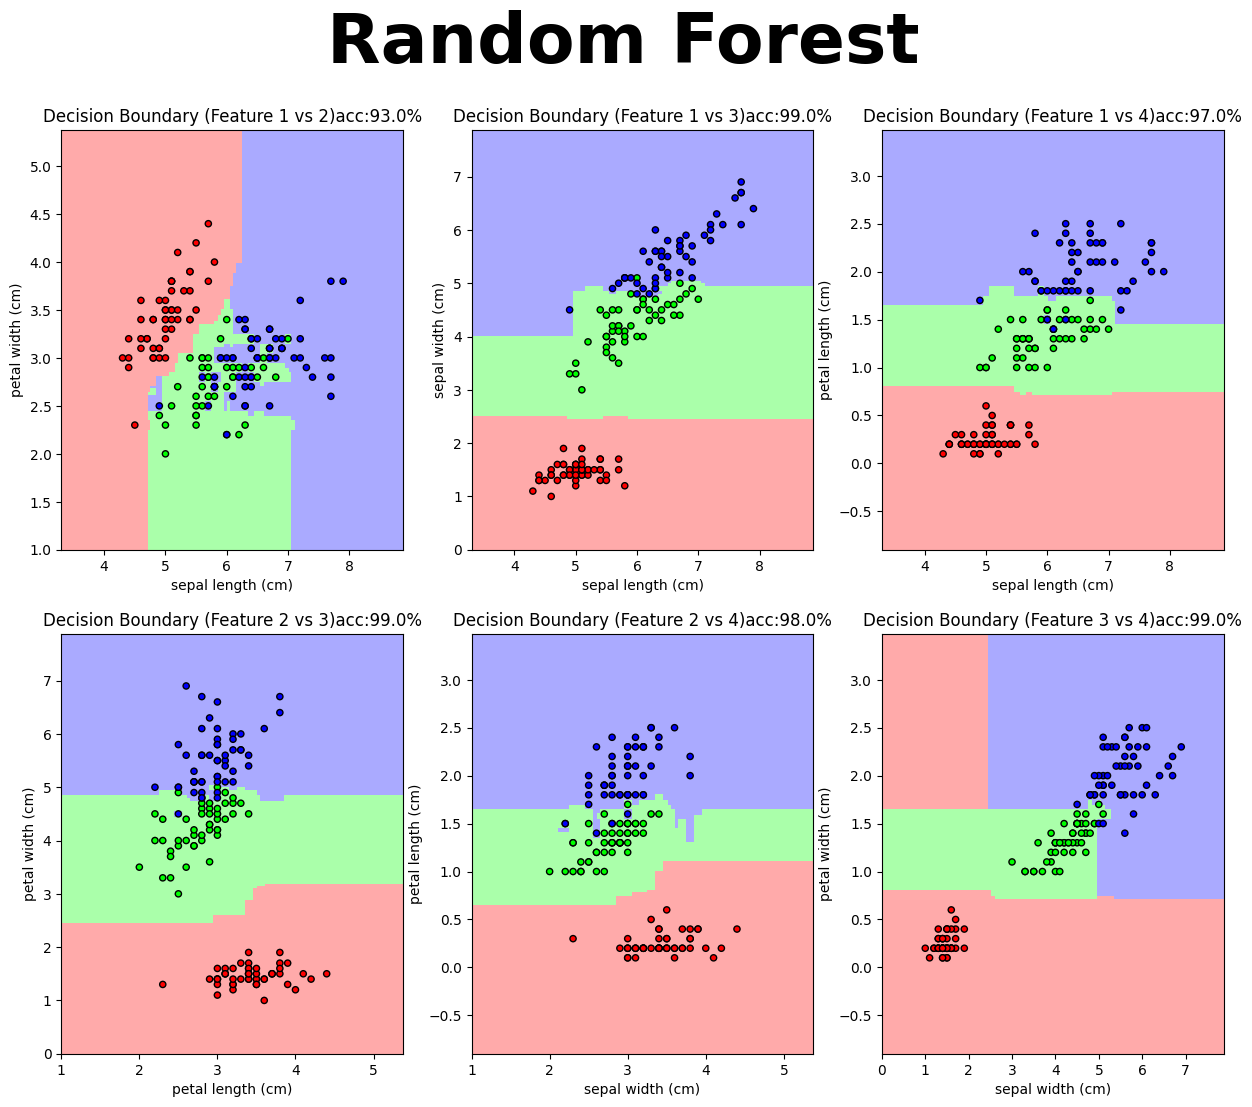

In [3]:

fig, axs = plt.subplots(2, 3, figsize=(15, 12))  # 创建2行3列的图形子图布局
# 绘制决策边界
for i in range(4):  # 遍历所有特征组合
    for j in range(i + 1, 4):
        k += 1
        # 获取特征数据
        x_train = x[:, [i, j]]  # 使用当前两个特征作为训练集
        RF.fit(x_train, y)  # 训练随机森林分类器
        feature_x = x[:, i]  # 第i个特征列
        feature_y = x[:, j]  # 第j个特征列

        # 设置绘图范围
        x_min, x_max = feature_x.min() - 1, feature_x.max() + 1  # x轴范围
        y_min, y_max = feature_y.min() - 1, feature_y.max() + 1  # y轴范围
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  # 创建网格点坐标矩阵
        # 进行预测
        z = RF.predict(np.c_[xx.ravel(), yy.ravel()])  # 对网格点进行预测
        z = z.reshape(xx.shape)  # 重塑形状以匹配网格
        plt.subplot(2, 3, k)  # 在指定的子图中进行绘制
        # 绘制决策边界和样本点
        plt.pcolormesh(xx, yy, z, cmap=cmap_light)  # 绘制决策边界
        plt.scatter(feature_x, feature_y, c=y, cmap=cmap_bold, edgecolors='k', s=20)  # 绘制样本点
        plt.xlim(xx.min(), xx.max())  # 设置x轴范围
        plt.ylim(yy.min(), yy.max())  # 设置y轴范围
        plt.title(f'Decision Boundary (Feature {i+1} vs {j+1})' + 'acc:' + str(round(RF.score(x_train, y), 2)*100)+'%')  # 设置标题
        axs[(k-1)//3, k % 3].set_xlabel(iris.feature_names[i])  # 设置x轴标签
        axs[(k-1)//3, k % 3].set_ylabel(iris.feature_names[j])  # 设置y轴标签
        plt.suptitle('Random Forest', fontsize=50, fontweight='bold')  # 设置总标题
# 显示图形
plt.show()
